In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import matplotlib
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
gym_df = pd.read_csv("megaGymDataset3.csv")
gym_df.rename(columns={'Title':'Exercise_name'}, inplace=True)
gym_df= gym_df.drop(["Unnamed: 0", "Desc", "RatingDesc"], axis=1)
gym_df['Number_of_sets'] = 4
gym_df['Reps'] = 0 
gym_df['RPE']= 0
gym_df.head()

,Exercise_name,Type,BodyPart,Equipment,Level,Rating,Number_of_sets,Reps,RPE
0,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,0,0
1,Ab Roller,Strength,Abdominals,Other,Intermediate,8.9,4,0,0
2,Sledgehammer swing,Plyometrics,Abdominals,Other,Intermediate,8.6,4,0,0
3,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,0,0
4,Cable reverse crunch,Strength,Abdominals,Cable,Beginner,8.2,4,0,0


In [3]:
# Conditionally assign RPE values based on the 'Level' column
gym_df.loc[gym_df['Level'] == 'Beginner', 'RPE'] = 7
gym_df.loc[gym_df['Level'] == 'Intermediate', 'RPE'] = 8
# You can set a default value or another condition if needed
gym_df.loc[gym_df['Level'] == 'Expert', 'RPE'] = 9

In [4]:
gym_df.loc[gym_df['RPE'] == 7, 'Resting_Period (in sec)'] = "60"
gym_df.loc[gym_df['RPE'] == 8, 'Resting_Period (in sec)'] = "90-120"
gym_df.loc[gym_df['RPE'] == 9, 'Resting_Period (in sec)'] = "120+ "

In [5]:
gym_df.loc[gym_df['RPE'] == 7, 'Reps'] = 12
gym_df.loc[gym_df['RPE'] == 8, 'Reps'] = 8
gym_df.loc[gym_df['RPE'] == 9, 'Reps'] = 6

In [6]:
gym_df.loc[gym_df['RPE'] == 7, 'sets_type'] = "04 Working"
gym_df.loc[gym_df['RPE'] == 8, 'sets_type'] = "01 Warmup & 03 Working"
gym_df.loc[gym_df['RPE'] == 9, 'sets_type'] = "01 Warmup & 04 Working"

In [7]:
gym_df.head()

,Exercise_name,Type,BodyPart,Equipment,Level,Rating,Number_of_sets,Reps,RPE,Resting_Period (in sec),sets_type
0,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working
1,Ab Roller,Strength,Abdominals,Other,Intermediate,8.9,4,8,8,90-120,01 Warmup & 03 Working
2,Sledgehammer swing,Plyometrics,Abdominals,Other,Intermediate,8.6,4,8,8,90-120,01 Warmup & 03 Working
3,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working
4,Cable reverse crunch,Strength,Abdominals,Cable,Beginner,8.2,4,12,7,60,04 Working


In [8]:
gym_df['RPE'].unique()

array([8, 7, 9], dtype=int64)

In [9]:
gym_df['Equipment'].unique()

array(['Barbell', 'Other', 'Cable', 'Body Only', 'Medicine Ball',
       'Exercise Ball', 'Bands', 'Machine', 'Foam Roll', 'Dumbbell',
       'E-Z Curl Bar', 'None', 'Kettlebells'], dtype=object)

In [10]:
gym_df['Type'].unique()

array(['Strength', 'Plyometrics', 'Stretching', 'Powerlifting',
       'Strongman', 'Olympic Weightlifting', 'Cardio'], dtype=object)

In [11]:
gym_df['Type'].replace({'Plyometrics': 'Conditioning'}, inplace=True)

In [12]:
gym_df['Type'].unique()

array(['Strength', 'Conditioning', 'Stretching', 'Powerlifting',
       'Strongman', 'Olympic Weightlifting', 'Cardio'], dtype=object)

In [13]:
gym_df['Level'].unique()

array(['Intermediate', 'Beginner', 'Expert'], dtype=object)

In [14]:
level_wise= gym_df.groupby(["BodyPart","Level"]).count()
level_wise

Exercise_name  Type  Equipment  Rating  \
BodyPart    Level                                                  
Abdominals  Beginner                  6     6          6       6   
            Intermediate             22    22         22      22   
Abductors   Beginner                  2     2          2       2   
            Intermediate              4     4          4       4   
Adductors   Beginner                  1     1          1       1   
            Intermediate              5     5          5       5   
Biceps      Beginner                 15    15         15      15   
            Intermediate             16    16         16      16   
Calves      Beginner                  7     7          7       7   
            Intermediate              5     5          5       5   
Chest       Beginner                 18    18         18      18   
            Intermediate             21    21         21      21   
Forearms    Beginner                  7     7          7       7   
            Intermediate              5     5          5       5   
Glutes      Beginner                  7     7          7       7   
            Intermediate              9     9          9       9   
Hamstrings  Beginner                 22    22         22      22   
            Intermediate             13    13         13      13   
Lats        Beginner                  7     7          7       7   
            Intermediate             16    16         16      16   
Lower Back  Beginner                  8     8          8       8   
            Intermediate              6     6          6       6   
Middle Back Beginner                  5     5          5       5   
            Intermediate             10    10         10      10   
Neck        Beginner                  4     4          4       4   
            Intermediate              2     2          2       2   
Quadriceps  Beginner                 15    15         15      15   
            Expert                    4     4          4       4   
            Intermediate             56    56         56      56   
Shoulders   Beginner                 15    15         15      15   
            Intermediate             28    28         28      28   
Traps       Beginner                  2     2          2       2   
            Intermediate              7     7          7       7   
Triceps     Beginner                  8     8          8       8   
            Intermediate             26    26         26      26   

                          Number_of_sets  Reps  RPE  Resting_Period (in sec)  \
BodyPart    Level                                                              
Abdominals  Beginner                   6     6    6                        6   
            Intermediate              22    22   22                       22   
Abductors   Beginner                   2     2    2                        2   
            Intermediate               4     4    4                        4   
Adductors   Beginner                   1     1    1                        1   
            Intermediate               5     5    5                        5   
Biceps      Beginner                  15    15   15                       15   
            Intermediate              16    16   16                       16   
Calves      Beginner                   7     7    7                        7   
            Intermediate               5     5    5                        5   
Chest       Beginner                  18    18   18                       18   
            Intermediate              21    21   21                       21   
Forearms    Beginner                   7     7    7                        7   
            Intermediate               5     5    5                        5   
Glutes      Beginner                   7     7    7                        7   
            Intermediate               9     9    9                        9   
Hamstrings  Beginner                  22    22   22                  

In [15]:
gym_df.isna().sum()

Exercise_name              0
Type                       0
BodyPart                   0
Equipment                  0
Level                      0
Rating                     0
Number_of_sets             0
Reps                       0
RPE                        0
Resting_Period (in sec)    0
sets_type                  0
dtype: int64

In [16]:
gym_df['Rating'].unique()

array([8.5, 8.9, 8.6, 8.2, 8.1, 7.7, 9. , 8.8, 8.7, 8.3, 8. , 7.5, 7. ,
       3.9, 0. , 8.4, 7.3, 6.7, 3.2, 9.2, 9.1, 7.4, 7.2, 7.1, 5. , 7.9,
       4.8, 6. , 5.3, 6.3, 4.1, 5.5, 7.6, 7.8, 5.9, 4.9, 9.5, 9.4, 9.3,
       6.2, 2.5, 5.2, 6.5, 3.1, 2.7, 4. , 2.4, 3.6, 1. , 5.8, 5.1, 4.4,
       5.4, 6.4, 2.8, 6.6, 6.8, 4.3, 3.4, 6.1, 4.5])

In [17]:
level_rating= gym_df.groupby(["Level","Rating"]).count()
level_rating

Exercise_name  Type  BodyPart  Equipment  Number_of_sets  \
Level        Rating                                                             
Beginner     0.0                38    38        38         38              38   
             1.0                 1     1         1          1               1   
             2.4                 1     1         1          1               1   
             2.5                 1     1         1          1               1   
             3.1                 1     1         1          1               1   
...                            ...   ...       ...        ...             ...   
Intermediate 9.1                 9     9         9          9               9   
             9.2                 7     7         7          7               7   
             9.3                 2     2         2          2               2   
             9.4                 7     7         7          7               7   
             9.5                 3     3         3          3               3   

                     Reps  RPE  Resting_Period (in sec)  sets_type  
Level        Rating                                                 
Beginner     0.0       38   38                       38         38  
             1.0        1    1                        1          1  
             2.4        1    1                        1          1  
             2.5        1    1                        1          1  
             3.1        1    1                        1          1  
...                   ...  ...                      ...        ...  
Intermediate 9.1        9    9                        9          9  
             9.2        7    7                        7          7  
             9.3        2    2                        2          2  
             9.4        7    7                        7          7  
             9.5        3    3                        3          3  

[101 rows x 9 columns]

In [18]:
gym_df.describe()

,Rating,Number_of_sets,Reps,RPE
count,404.000000,404.0,404.000000,404.000000
mean,6.433168,4.0,9.455446,7.641089
std,3.273904,0.0,1.957487,0.500516
min,0.000000,4.0,6.000000,7.000000
25%,5.100000,4.0,8.000000,7.000000
50%,8.200000,4.0,8.000000,8.000000
75%,8.700000,4.0,12.000000,8.000000
max,9.500000,4.0,12.000000,9.000000


In [19]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Exercise_name            404 non-null    object 
 1   Type                     404 non-null    object 
 2   BodyPart                 404 non-null    object 
 3   Equipment                404 non-null    object 
 4   Level                    404 non-null    object 
 5   Rating                   404 non-null    float64
 6   Number_of_sets           404 non-null    int64  
 7   Reps                     404 non-null    int64  
 8   RPE                      404 non-null    int64  
 9   Resting_Period (in sec)  404 non-null    object 
 10  sets_type                404 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 34.8+ KB


In [20]:
gym_df['BodyPart'] = gym_df['BodyPart'].replace({'Adductors':'Hamstrings'})

In [21]:
body_part= gym_df.groupby(["BodyPart"]).count()
body_part

,Exercise_name,Type,Equipment,Level,Rating,Number_of_sets,Reps,RPE,Resting_Period (in sec),sets_type
BodyPart,,,,,,,,,,
Abdominals,28,28,28,28,28,28,28,28,28,28
Abductors,6,6,6,6,6,6,6,6,6,6
Biceps,31,31,31,31,31,31,31,31,31,31
Calves,12,12,12,12,12,12,12,12,12,12
Chest,39,39,39,39,39,39,39,39,39,39
Forearms,12,12,12,12,12,12,12,12,12,12
Glutes,16,16,16,16,16,16,16,16,16,16
Hamstrings,41,41,41,41,41,41,41,41,41,41
Lats,23,23,23,23,23,23,23,23,23,23


In [22]:
gym_df.nunique()

Exercise_name              398
Type                         7
BodyPart                    16
Equipment                   13
Level                        3
Rating                      61
Number_of_sets               1
Reps                         3
RPE                          3
Resting_Period (in sec)      3
sets_type                    3
dtype: int64

In [23]:
gym_df.shape

(404, 11)

In [24]:
gym_df.duplicated().sum()

6

In [25]:
gym_df.drop_duplicates(subset=['Exercise_name'])

,Exercise_name,Type,BodyPart,Equipment,Level,Rating,Number_of_sets,Reps,RPE,Resting_Period (in sec),sets_type
0,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working
1,Ab Roller,Strength,Abdominals,Other,Intermediate,8.9,4,8,8,90-120,01 Warmup & 03 Working
2,Sledgehammer swing,Conditioning,Abdominals,Other,Intermediate,8.6,4,8,8,90-120,01 Warmup & 03 Working
4,Cable reverse crunch,Strength,Abdominals,Cable,Beginner,8.2,4,12,7,60,04 Working
5,Cable Russian Twists,Strength,Abdominals,Cable,Beginner,8.1,4,12,7,60,04 Working
...,...,...,...,...,...,...,...,...,...,...,...
399,Standing Towel Triceps Extension,Strength,Triceps,Body Only,Beginner,6.5,4,12,7,60,04 Working
400,Tricep Side Stretch,Stretching,Triceps,Body Only,Intermediate,5.5,4,8,8,90-120,01 Warmup & 03 Working
401,Triceps Stretch,Stretching,Triceps,Body Only,Intermediate,4.8,4,8,8,90-120,01 Warmup & 03 Working
402,EZ-Bar Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,4,8,8,90-120,01 Warmup & 03 Working


In [26]:
exercise_level= gym_df.groupby("Type")["Exercise_name"].count()
exercise_level

Type
Cardio                    19
Conditioning              43
Olympic Weightlifting      1
Powerlifting              16
Strength                 262
Stretching                59
Strongman                  4
Name: Exercise_name, dtype: int64

In [27]:
gym_df.columns

Index(['Exercise_name', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating',
       'Number_of_sets', 'Reps', 'RPE', 'Resting_Period (in sec)',
       'sets_type'],
      dtype='object')

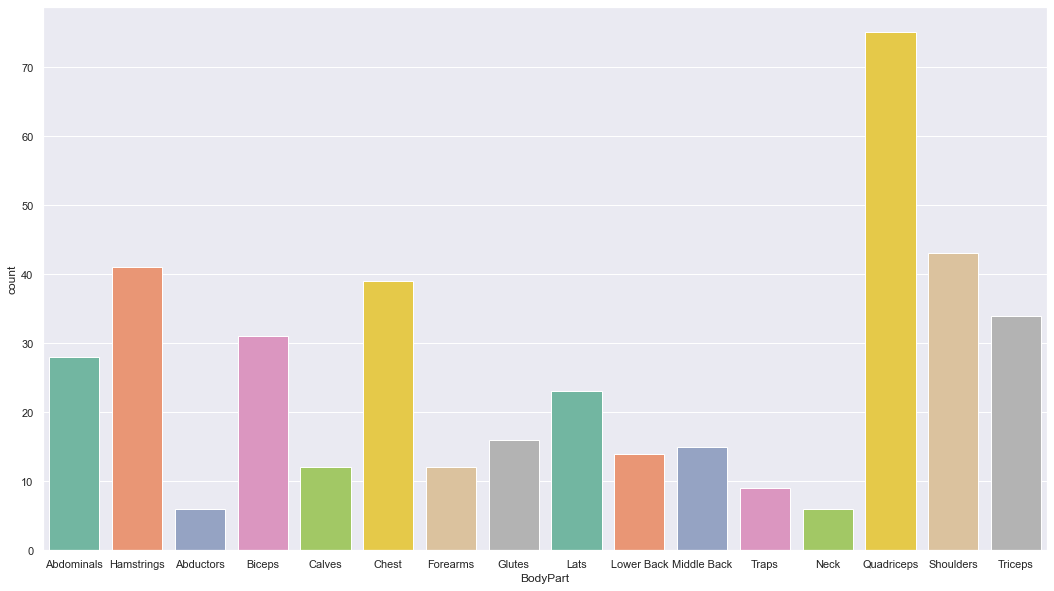

In [28]:
plt.figure(figsize=(18,10))
sns.set(style='darkgrid')
ax = sns.countplot(x= 'BodyPart', data= gym_df, palette='Set2')

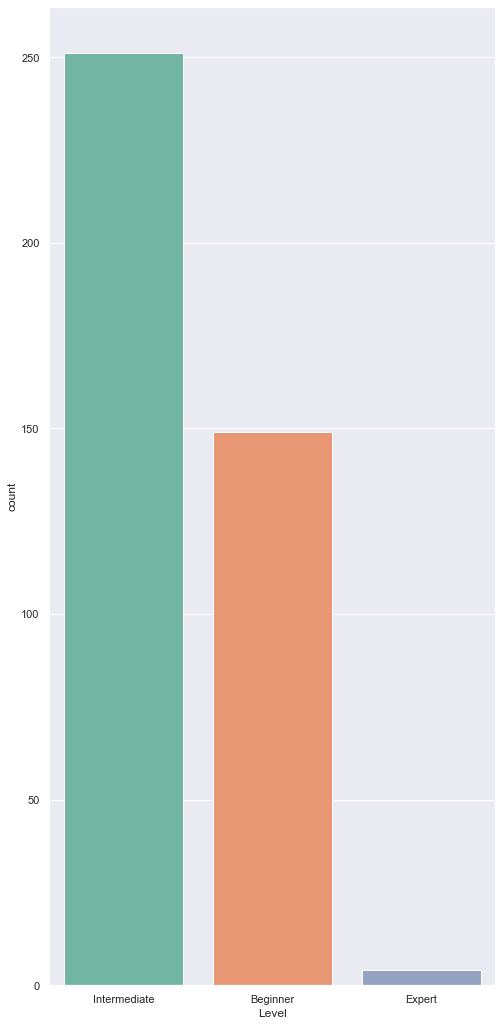

In [29]:
plt.figure(figsize=(8,18))
sns.set(style='darkgrid')
ax = sns.countplot(x= 'Level', data= gym_df, palette='Set2')

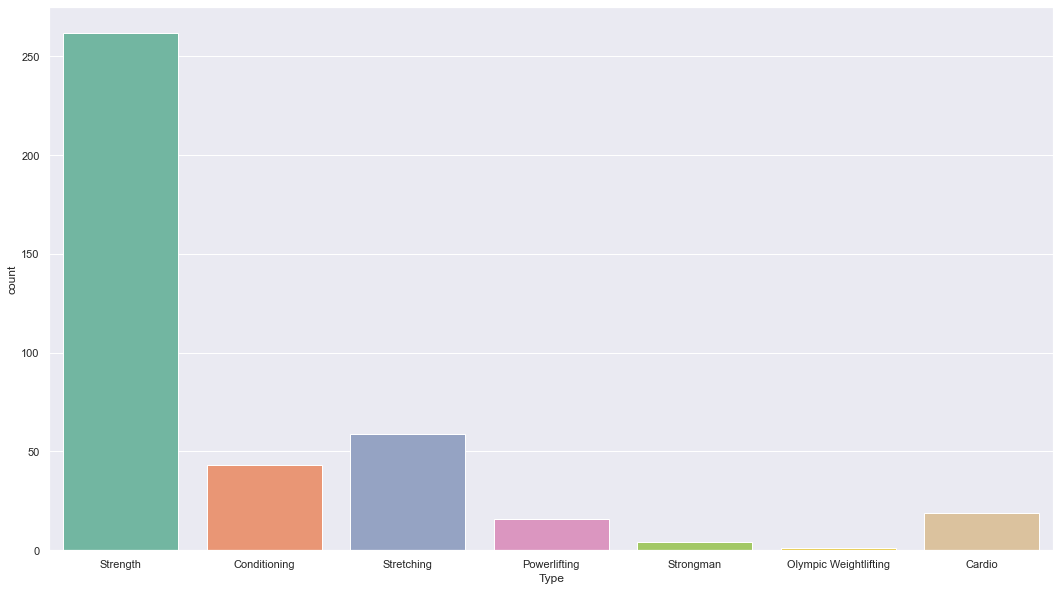

In [30]:
plt.figure(figsize=(18,10))
sns.set(style='darkgrid')
ax = sns.countplot(x= 'Type', data= gym_df, palette='Set2')

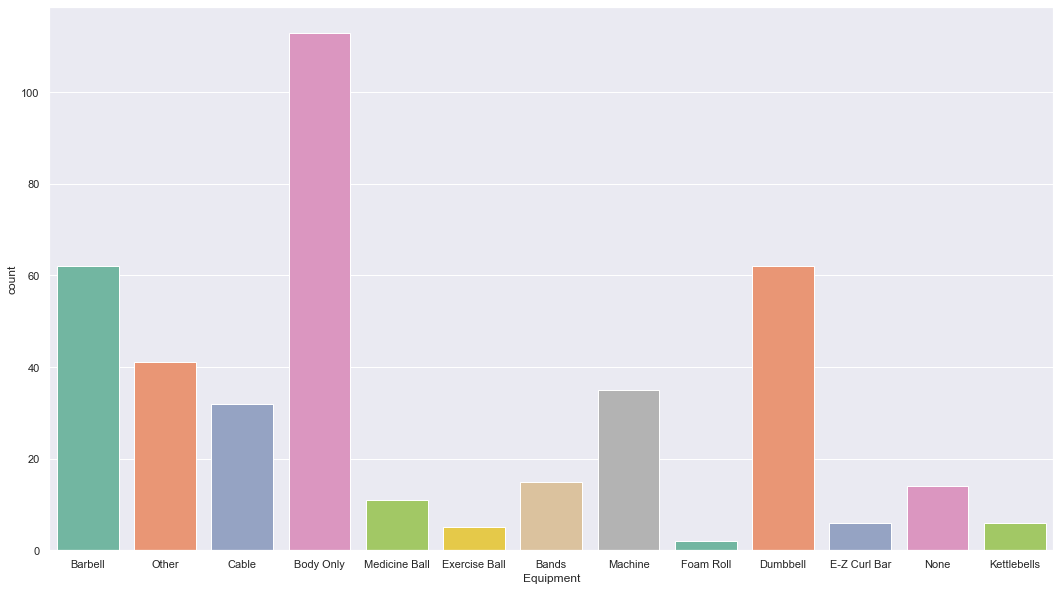

In [31]:
plt.figure(figsize=(18,10))
sns.set(style='darkgrid')
ax = sns.countplot(x= 'Equipment', data= gym_df, palette='Set2')

In [32]:
body_type = gym_df.groupby(['Type', 'BodyPart']).count()
body_type

Exercise_name  Equipment  Level  Rating  \
Type                  BodyPart                                               
Cardio                Middle Back              1          1      1       1   
                      Quadriceps              17         17     17      17   
                      Shoulders                1          1      1       1   
Conditioning          Abdominals               5          5      5       5   
                      Chest                   12         12     12      12   
                      Hamstrings              10         10     10      10   
                      Lats                     2          2      2       2   
                      Quadriceps               9          9      9       9   
                      Shoulders                5          5      5       5   
Olympic Weightlifting Glutes                   1          1      1       1   
Powerlifting          Chest                    1          1      1       1   
                      Glutes                   3          3      3       3   
                      Hamstrings               4          4      4       4   
                      Lower Back               5          5      5       5   
                      Quadriceps               1          1      1       1   
                      Triceps                  2          2      2       2   
Strength              Abdominals              20         20     20      20   
                      Abductors                4          4      4       4   
                      Biceps                  28         28     28      28   
                      Calves                   6          6      6       6   
                      Chest                   25         25     25      25   
                      Forearms                 9          9      9       9   
                      Glutes                   9          9      9       9   
                      Hamstrings              16         16     16      16   
                      Lats                    17         17     17      17   
                      Lower Back               3          3      3       3   
                      Middle Back             14         14     14      14   
                      Neck                     4          4      4       4   
                      Quadriceps              41         41     41      41   
                      Shoulders               27         27     27      27   
                      Traps                    9          9      9       9   
                      Triceps                 30         30     30      30   
Stretching            Abdominals               3          3      3       3   
                      Abductors                2          2      2       2   
                      Biceps                   3          3      3       3   
                      Calves                   6          6      6       6   
                      Chest                    1          1      1       1   
                      Forearms                 2          2      2       2   
                      Glutes                   3          3      3       3   
                      Hamstrings              11         11     11      11   
                      Lats                     4          4      4       4   
                      Lower Back               6          6      6       6   
                      Neck                     2          2      2       2   
                      Quadriceps               4          4      4       4   
                      Shoulders               10         10     10      10   
                      Triceps                  2          2      2       2   
Strongman             Forearms                 1          1      1       1   
                      Quadriceps               3          3      3       3   

                                   Number_of_sets  Reps  RPE  \
Type                  BodyPart                                 
Cardio

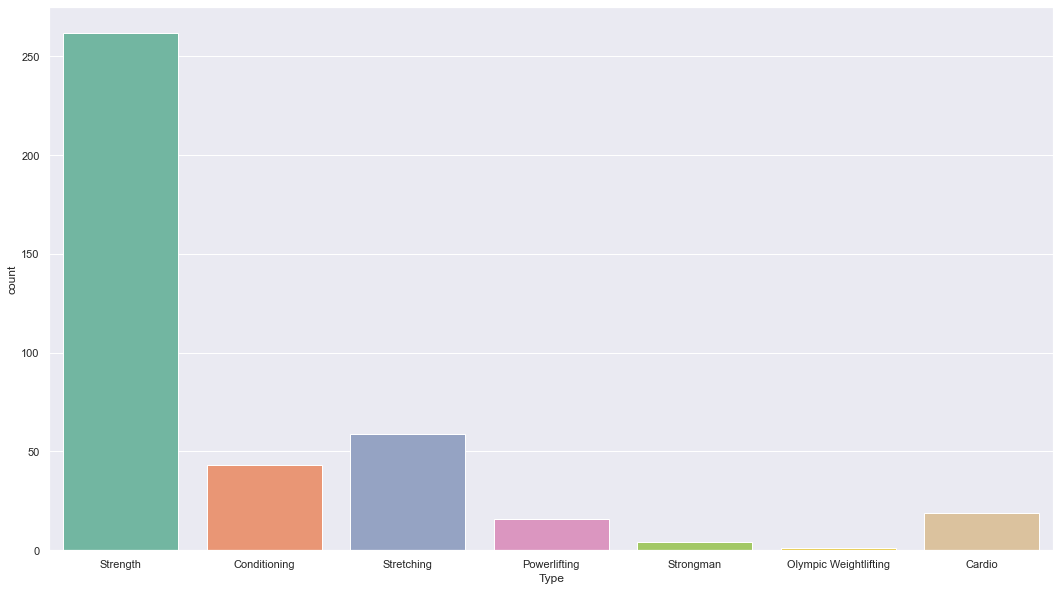

In [33]:
plt.figure(figsize=(18,10))
sns.set(style='darkgrid')
ax = sns.countplot(x= 'Type', data= gym_df, palette='Set2')

In [34]:
gym_df['BodyPart'].unique()

array(['Abdominals', 'Hamstrings', 'Abductors', 'Biceps', 'Calves',
       'Chest', 'Forearms', 'Glutes', 'Lats', 'Lower Back', 'Middle Back',
       'Traps', 'Neck', 'Quadriceps', 'Shoulders', 'Triceps'],
      dtype=object)

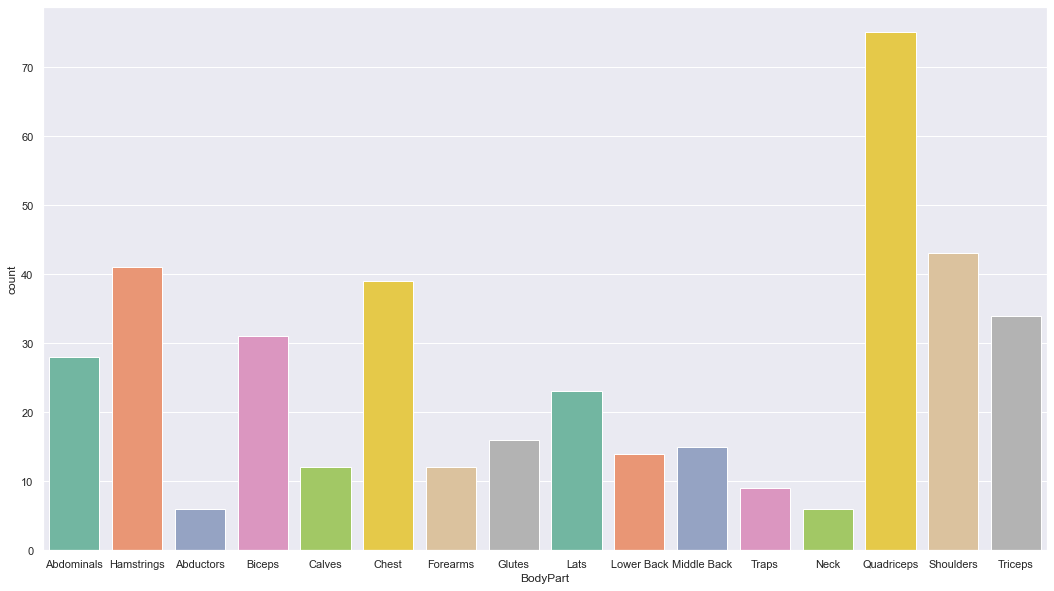

In [35]:
plt.figure(figsize=(18,10))
sns.set(style='darkgrid')
ax = sns.countplot(x= 'BodyPart', data= gym_df, palette='Set2')

In [36]:
push_muscles = ['Chest', 'Shoulders', 'Triceps']
leg_muscles = ['Adductors', 'Calves', 'Glutes', 'Hamstrings', 'Abductors', 'Quadriceps']
pull_muscles = ['Lower Back', 'Middle Back','Biceps', 'Forearms', 'Traps','Lats','Neck']
core_muscles = ['Abdominals']

In [37]:
pull_mask = gym_df['BodyPart'].isin(pull_muscles)
leg_mask = gym_df['BodyPart'].isin(leg_muscles)
push_mask = gym_df['BodyPart'].isin(push_muscles)
core_mask = gym_df['BodyPart'].isin(core_muscles)
gym_df.loc[pull_mask, 'Could_Include_in'] = "Pull-Workout"
gym_df.loc[push_mask, 'Could_Include_in'] = "Push-Workout"
gym_df.loc[leg_mask, 'Could_Include_in'] = "Legs-Workout"
gym_df.loc[core_mask, 'Could_Include_in'] = "Abs-Workout"

In [38]:
gym_df['Could_Include_in'].unique()

array(['Abs-Workout', 'Legs-Workout', 'Pull-Workout', 'Push-Workout'],
      dtype=object)

In [39]:
body_type = gym_df.groupby(['Could_Include_in', 'BodyPart']).count()
body_type

Exercise_name  Type  Equipment  Level  Rating  \
Could_Include_in BodyPart                                                     
Abs-Workout      Abdominals              28    28         28     28      28   
Legs-Workout     Abductors                6     6          6      6       6   
                 Calves                  12    12         12     12      12   
                 Glutes                  16    16         16     16      16   
                 Hamstrings              41    41         41     41      41   
                 Quadriceps              75    75         75     75      75   
Pull-Workout     Biceps                  31    31         31     31      31   
                 Forearms                12    12         12     12      12   
                 Lats                    23    23         23     23      23   
                 Lower Back              14    14         14     14      14   
                 Middle Back             15    15         15     15      15   
                 Neck                     6     6          6      6       6   
                 Traps                    9     9          9      9       9   
Push-Workout     Chest                   39    39         39     39      39   
                 Shoulders               43    43         43     43      43   
                 Triceps                 34    34         34     34      34   

                              Number_of_sets  Reps  RPE  \
Could_Include_in BodyPart                                 
Abs-Workout      Abdominals               28    28   28   
Legs-Workout     Abductors                 6     6    6   
                 Calves                   12    12   12   
                 Glutes                   16    16   16   
                 Hamstrings               41    41   41   
                 Quadriceps               75    75   75   
Pull-Workout     Biceps                   31    31   31   
                 Forearms                 12    12   12   
                 Lats                     23    23   23   
                 Lower Back               14    14   14   
                 Middle Back              15    15   15   
                 Neck                      6     6    6   
                 Traps                     9     9    9   
Push-Workout     Chest                    39    39   39   
                 Shoulders                43    43   43   
                 Triceps                  34    34   34   

                              Resting_Period (in sec)  sets_type  
Could_Include_in BodyPart                                         
Abs-Workout      Abdominals                        28         28  
Legs-Workout     Abductors                          6          6  
                 Calves                            12         12  
                 Glutes                            16         16  
                 Hamstrings                        41         41  
                 Quadriceps                        75         75  
Pull-Workout     Biceps                            31         31  
                 Forearms                          12         12  
                 Lats                              23         23  
                 Lower Back                        14         14  
                 Middle Back                       15         15  
                 Neck                               6          6  
                 Traps                              9          9  
Push-Workout     Chest                             39         39  
                 Shoulders                         43         43  
                 Triceps                           34         34

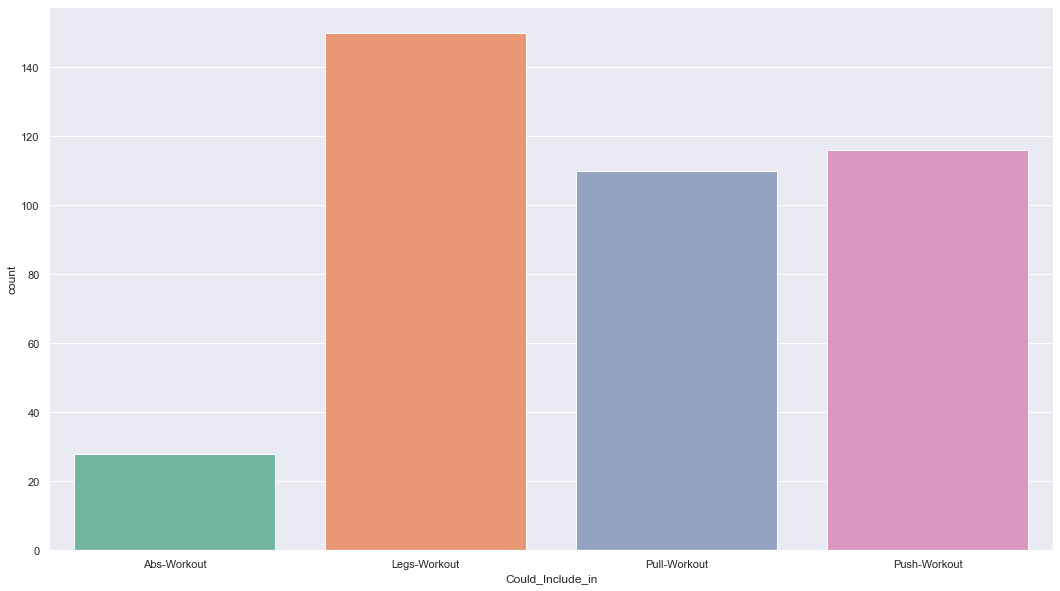

In [40]:
plt.figure(figsize=(18,10))
sns.set(style='darkgrid')
ax = sns.countplot(x= 'Could_Include_in', data= gym_df, palette='Set2')

In [41]:
gym_df["Equipment"].replace({'None':'Body Weight', 'Body Only':'Body Weight'}, inplace=True)

In [42]:
gym_df['Equipment'].unique()

array(['Barbell', 'Other', 'Cable', 'Body Weight', 'Medicine Ball',
       'Exercise Ball', 'Bands', 'Machine', 'Foam Roll', 'Dumbbell',
       'E-Z Curl Bar', 'Kettlebells'], dtype=object)

In [43]:
cardio = ['Cardio', 'Olympic Weightlifting']
stretching = ['Stretching']
strength = ['Powerlifting', 'Strength', 'Strongman']
conditioning = ['Conditioning']
cardio_mask = gym_df['Type'].isin(cardio)
stretching_mask = gym_df['Type'].isin(stretching)
strength_mask = gym_df['Type'].isin(strength)
conditioning_mask = gym_df['Type'].isin(conditioning)
gym_df.loc[strength_mask, 'Used_In'] = 'Strength'
gym_df.loc[cardio_mask, 'Used_In'] = 'Cardio'
gym_df.loc[stretching_mask, 'Used_In'] = 'Stretching'
gym_df.loc[conditioning_mask, 'Used_In'] = 'Conditioning/Body Weight'

In [44]:
gym_df.head()

,Exercise_name,Type,BodyPart,Equipment,Level,Rating,Number_of_sets,Reps,RPE,Resting_Period (in sec),sets_type,Could_Include_in,Used_In
0,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
1,Ab Roller,Strength,Abdominals,Other,Intermediate,8.9,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
2,Sledgehammer swing,Conditioning,Abdominals,Other,Intermediate,8.6,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Conditioning/Body Weight
3,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
4,Cable reverse crunch,Strength,Abdominals,Cable,Beginner,8.2,4,12,7,60,04 Working,Abs-Workout,Strength


In [45]:
gym_df['Used_In'].unique()

array(['Strength', 'Conditioning/Body Weight', 'Stretching', 'Cardio'],
      dtype=object)

In [46]:
gym_df.isna().sum()

Exercise_name              0
Type                       0
BodyPart                   0
Equipment                  0
Level                      0
Rating                     0
Number_of_sets             0
Reps                       0
RPE                        0
Resting_Period (in sec)    0
sets_type                  0
Could_Include_in           0
Used_In                    0
dtype: int64

In [47]:
gym_df.head()

,Exercise_name,Type,BodyPart,Equipment,Level,Rating,Number_of_sets,Reps,RPE,Resting_Period (in sec),sets_type,Could_Include_in,Used_In
0,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
1,Ab Roller,Strength,Abdominals,Other,Intermediate,8.9,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
2,Sledgehammer swing,Conditioning,Abdominals,Other,Intermediate,8.6,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Conditioning/Body Weight
3,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
4,Cable reverse crunch,Strength,Abdominals,Cable,Beginner,8.2,4,12,7,60,04 Working,Abs-Workout,Strength


In [48]:
gym_df['Could_Include_in'].unique()

array(['Abs-Workout', 'Legs-Workout', 'Pull-Workout', 'Push-Workout'],
      dtype=object)

In [49]:
gym_df.columns

Index(['Exercise_name', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating',
       'Number_of_sets', 'Reps', 'RPE', 'Resting_Period (in sec)', 'sets_type',
       'Could_Include_in', 'Used_In'],
      dtype='object')

In [50]:
gym_df.head()

,Exercise_name,Type,BodyPart,Equipment,Level,Rating,Number_of_sets,Reps,RPE,Resting_Period (in sec),sets_type,Could_Include_in,Used_In
0,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
1,Ab Roller,Strength,Abdominals,Other,Intermediate,8.9,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
2,Sledgehammer swing,Conditioning,Abdominals,Other,Intermediate,8.6,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Conditioning/Body Weight
3,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5,4,8,8,90-120,01 Warmup & 03 Working,Abs-Workout,Strength
4,Cable reverse crunch,Strength,Abdominals,Cable,Beginner,8.2,4,12,7,60,04 Working,Abs-Workout,Strength


In [51]:
level_wise_analysis = gym_df.groupby('Level')['Exercise_name'].count()
level_wise_analysis

Level
Beginner        149
Expert            4
Intermediate    251
Name: Exercise_name, dtype: int64

In [52]:
gym_df['Equipment'].unique()

array(['Barbell', 'Other', 'Cable', 'Body Weight', 'Medicine Ball',
       'Exercise Ball', 'Bands', 'Machine', 'Foam Roll', 'Dumbbell',
       'E-Z Curl Bar', 'Kettlebells'], dtype=object)

In [53]:
gym_df['Type'].unique()

array(['Strength', 'Conditioning', 'Stretching', 'Powerlifting',
       'Strongman', 'Olympic Weightlifting', 'Cardio'], dtype=object)

In [54]:
used_in_analysis = gym_df.groupby('Used_In')['Exercise_name'].count()
used_in_analysis

Used_In
Cardio                       20
Conditioning/Body Weight     43
Strength                    282
Stretching                   59
Name: Exercise_name, dtype: int64

In [55]:
bodypart_analysis = gym_df.groupby('BodyPart')['Exercise_name'].count()
bodypart_analysis

BodyPart
Abdominals     28
Abductors       6
Biceps         31
Calves         12
Chest          39
Forearms       12
Glutes         16
Hamstrings     41
Lats           23
Lower Back     14
Middle Back    15
Neck            6
Quadriceps     75
Shoulders      43
Traps           9
Triceps        34
Name: Exercise_name, dtype: int64

In [56]:
gym_df.columns

Index(['Exercise_name', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating',
       'Number_of_sets', 'Reps', 'RPE', 'Resting_Period (in sec)', 'sets_type',
       'Could_Include_in', 'Used_In'],
      dtype='object')

In [57]:
feature_column= ['Type','BodyPart','Equipment','Level','Rating','Number_of_sets','Reps','RPE','Resting_Period (in sec)','sets_type','Could_Include_in','Used_In']
target_column = 'Exercise_name'

X= gym_df[feature_column]
y= gym_df[target_column]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print("The shape of X_train is: {}".format(X_train.shape))
print("The shape of y_train is: {}".format(y_train.shape))
print("The shape of X_test is: {}".format(X_test.shape))
print("The shape of y_test is: {}".format(y_test.shape))

The shape of X_train is: (323, 12)
The shape of y_train is: (323,)
The shape of X_test is: (81, 12)
The shape of y_test is: (81,)


In [60]:
gym_df['Used_In'].unique()

array(['Strength', 'Conditioning/Body Weight', 'Stretching', 'Cardio'],
      dtype=object)

In [61]:
strength = gym_df[gym_df['Used_In'] == 'Strength']
cardio = gym_df[gym_df['Used_In']=='Cardio']
stretching = gym_df[gym_df['Used_In']== 'Stretching']
conditioning = gym_df[gym_df['Used_In']== 'Conditioning/Body Weight']

In [66]:
strength['Used_In'].unique()

array(['Strength'], dtype=object)

In [67]:
cardio['Used_In'].unique()

array(['Cardio'], dtype=object)

In [68]:
stretching['Used_In'].unique()

array(['Stretching'], dtype=object)

In [69]:
conditioning['Used_In'].unique()

array(['Conditioning/Body Weight'], dtype=object)